In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=78335d6b340c1bbc062a8d3ae097add4711dd0f5a40ba5eadd821266f61213fa
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
!git clone https://github.com/paavansaireddy/MultiDiseasePrediction

Cloning into 'MultiDiseasePrediction'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 1), reused 13 (delta 1), pack-reused 0
Receiving objects: 100% (13/13), 1.74 MiB | 4.42 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:

import numpy as npy
import pandas as pnd
import seaborn as sbn
import matplotlib.pyplot as mtplt

from pyspark import RDD
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
spark = SparkSession.builder \
    .appName("CSV Read and Split") \
    .getOrCreate()

df = pnd.read_csv("/content/MultiDiseasePrediction/MultDiseaseDB/Blood_samples_dataset_balanced_2(f).csv")

In [ ]:
print(df.shape)

(2351, 25)


In [ ]:
dfc = df.copy()
print(dfc.shape)

(2351, 25)


In [ ]:
df_anlys = df.copy()

In [ ]:
print(df_anlys.head())

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

In [ ]:
print(df_anlys.columns)

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')


In [ ]:
missing_count = df_anlys.isnull().sum()

In [ ]:
# check the type of all features
df_anlys.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [ ]:
print(missing_count)
# Null values are already handled

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64


<Axes: xlabel='Disease'>

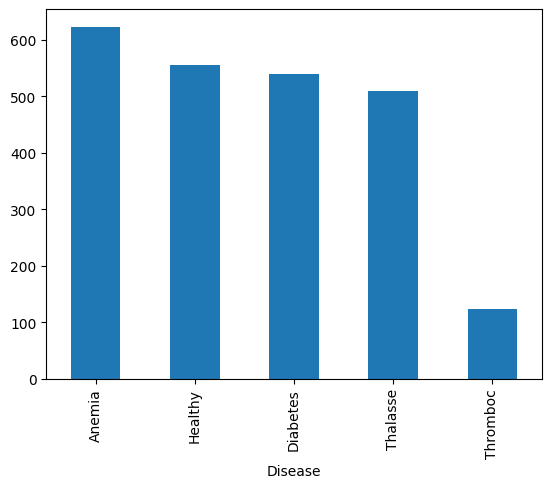

In [ ]:
# calculate the class imbalance
print(df_anlys['Disease'].value_counts())
df_anlys['Disease'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'White Blood Cells'}>],
       [<Axes: title={'center': 'Red Blood Cells'}>,
        <Axes: title={'center': 'Hematocrit'}>,
        <Axes: title={'center': 'Mean Corpuscular Volume'}>,
        <Axes: title={'center': 'Mean Corpuscular Hemoglobin'}>,
        <Axes: title={'center': 'Mean Corpuscular Hemoglobin Concentration'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Systolic Blood Pressure'}>,
        <Axes: title={'center': 'Diastolic Blood Pressure'}>,
        <Axes: title={'center': 'Triglycerides'}>],
       [<Axes: title={'center': 'HbA1c'}>,
        <Axes: title={'center': 'LDL Cholesterol'}>,
        <Axes: title={'center': 'HDL Cholesterol'}>,
        <Axes: title={'center': 'ALT'}

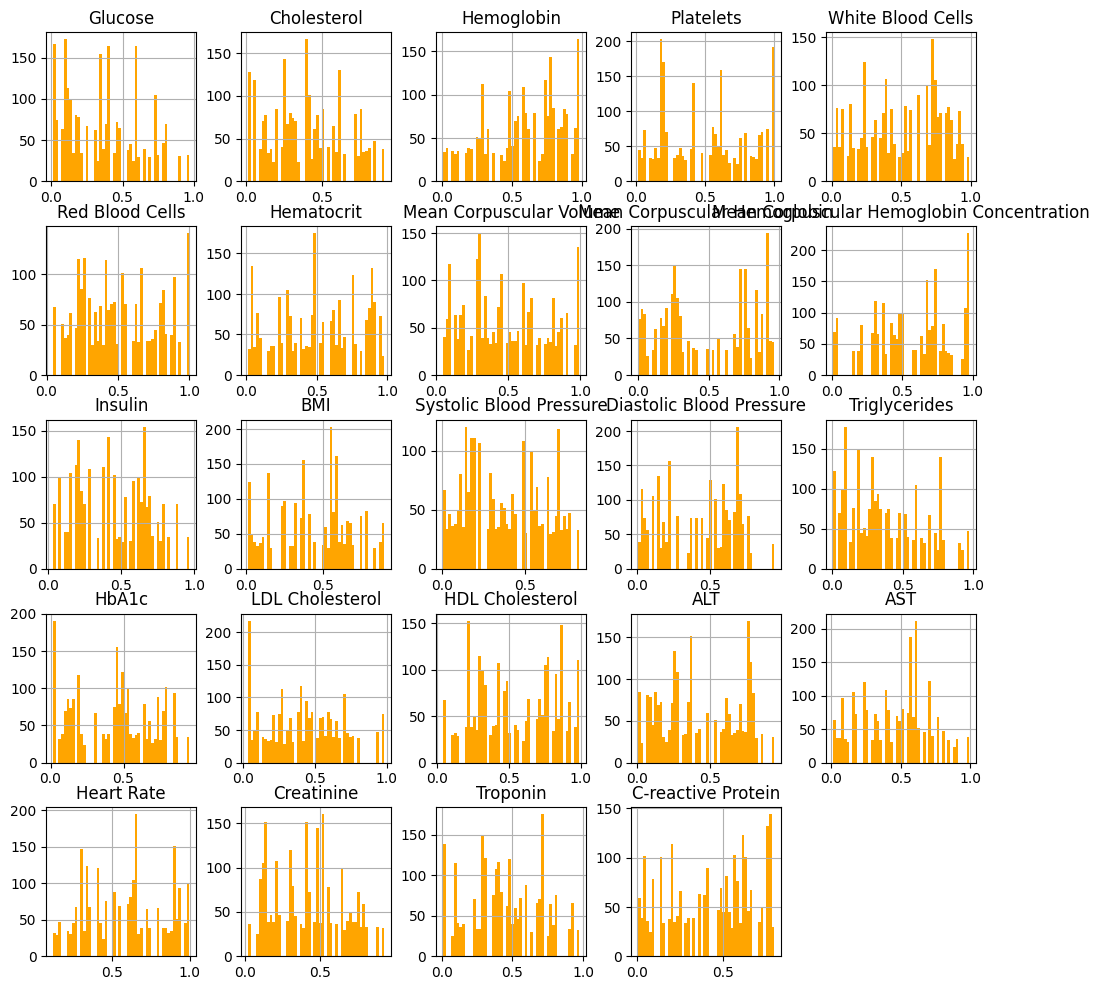

In [ ]:
# plotting the distribution of all features
df_num_columns= df_anlys.select_dtypes(include=['float64'])
df_num_columns.hist(figsize=(12,12), bins=50, xlabelsize=10, ylabelsize=10, color = 'orange')

In [ ]:
label_encoder = LabelEncoder()
df_anlys['Disease_Encoded'] = label_encoder.fit_transform(df_anlys['Disease'])

In [ ]:
print(df_anlys['Disease_Encoded'].value_counts())

Disease_Encoded
0    623
2    556
1    540
3    509
4    123
Name: count, dtype: int64


<ipython-input-87-12868e6f54c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(x='Disease_Encoded', y=reading, data=df_anlys, palette='coolwarm')


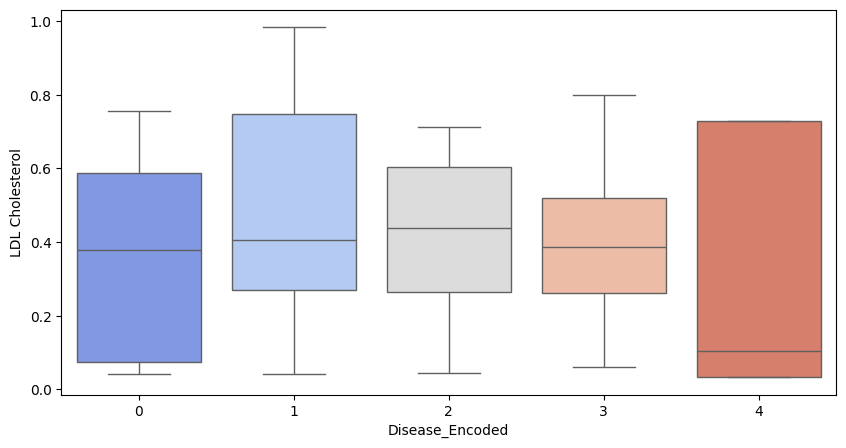

<ipython-input-87-12868e6f54c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(x='Disease_Encoded', y=reading, data=df_anlys, palette='coolwarm')


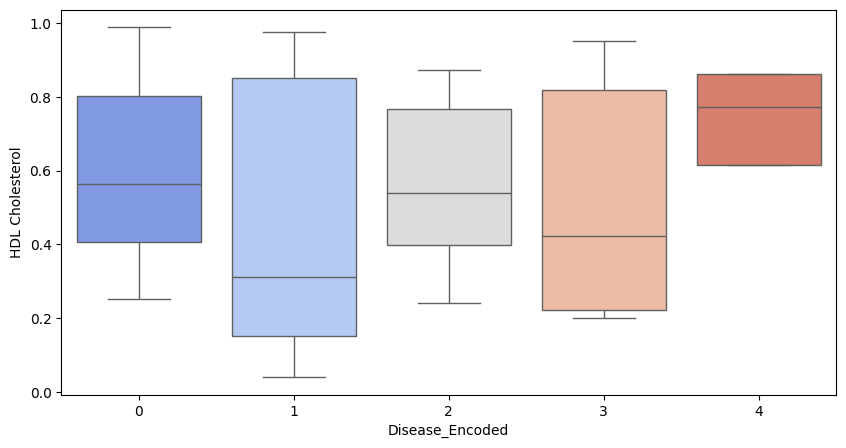

<ipython-input-87-12868e6f54c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(x='Disease_Encoded', y=reading, data=df_anlys, palette='coolwarm')


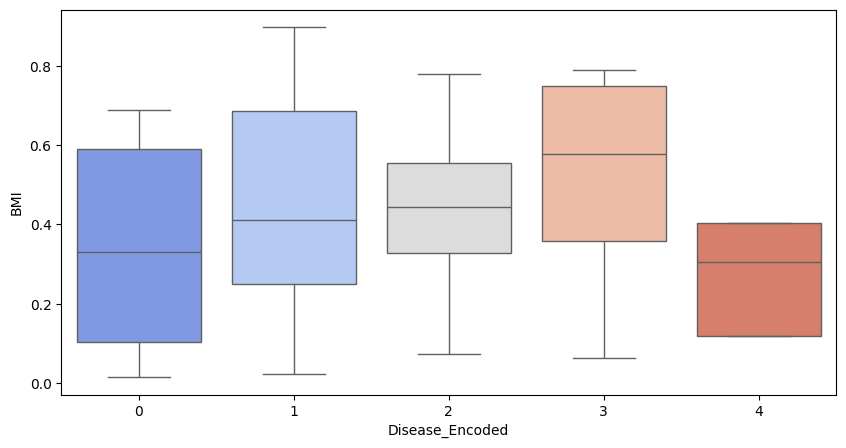

<ipython-input-87-12868e6f54c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(x='Disease_Encoded', y=reading, data=df_anlys, palette='coolwarm')


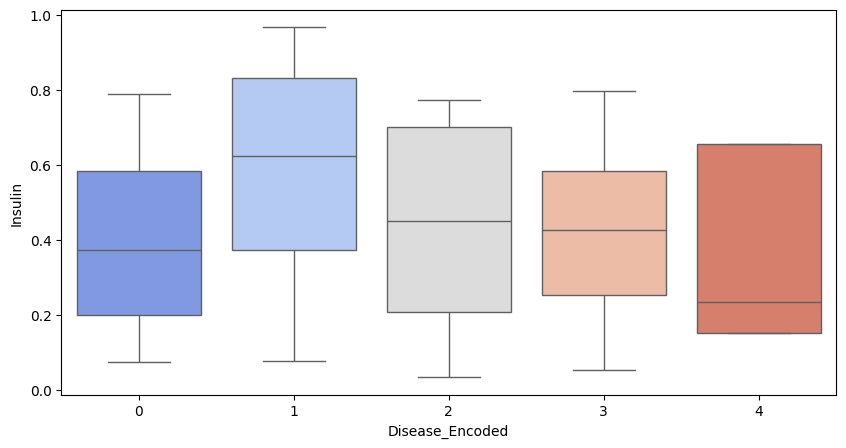

In [ ]:
for reading in ['LDL Cholesterol', 'HDL Cholesterol', 'BMI', 'Insulin']:
  mtplt.figure(figsize=(10, 5))
  sbn.boxplot(x='Disease_Encoded', y=reading, data=df_anlys, palette='coolwarm')
  mtplt.show()

Top 5 correlated features with the Key column are: 


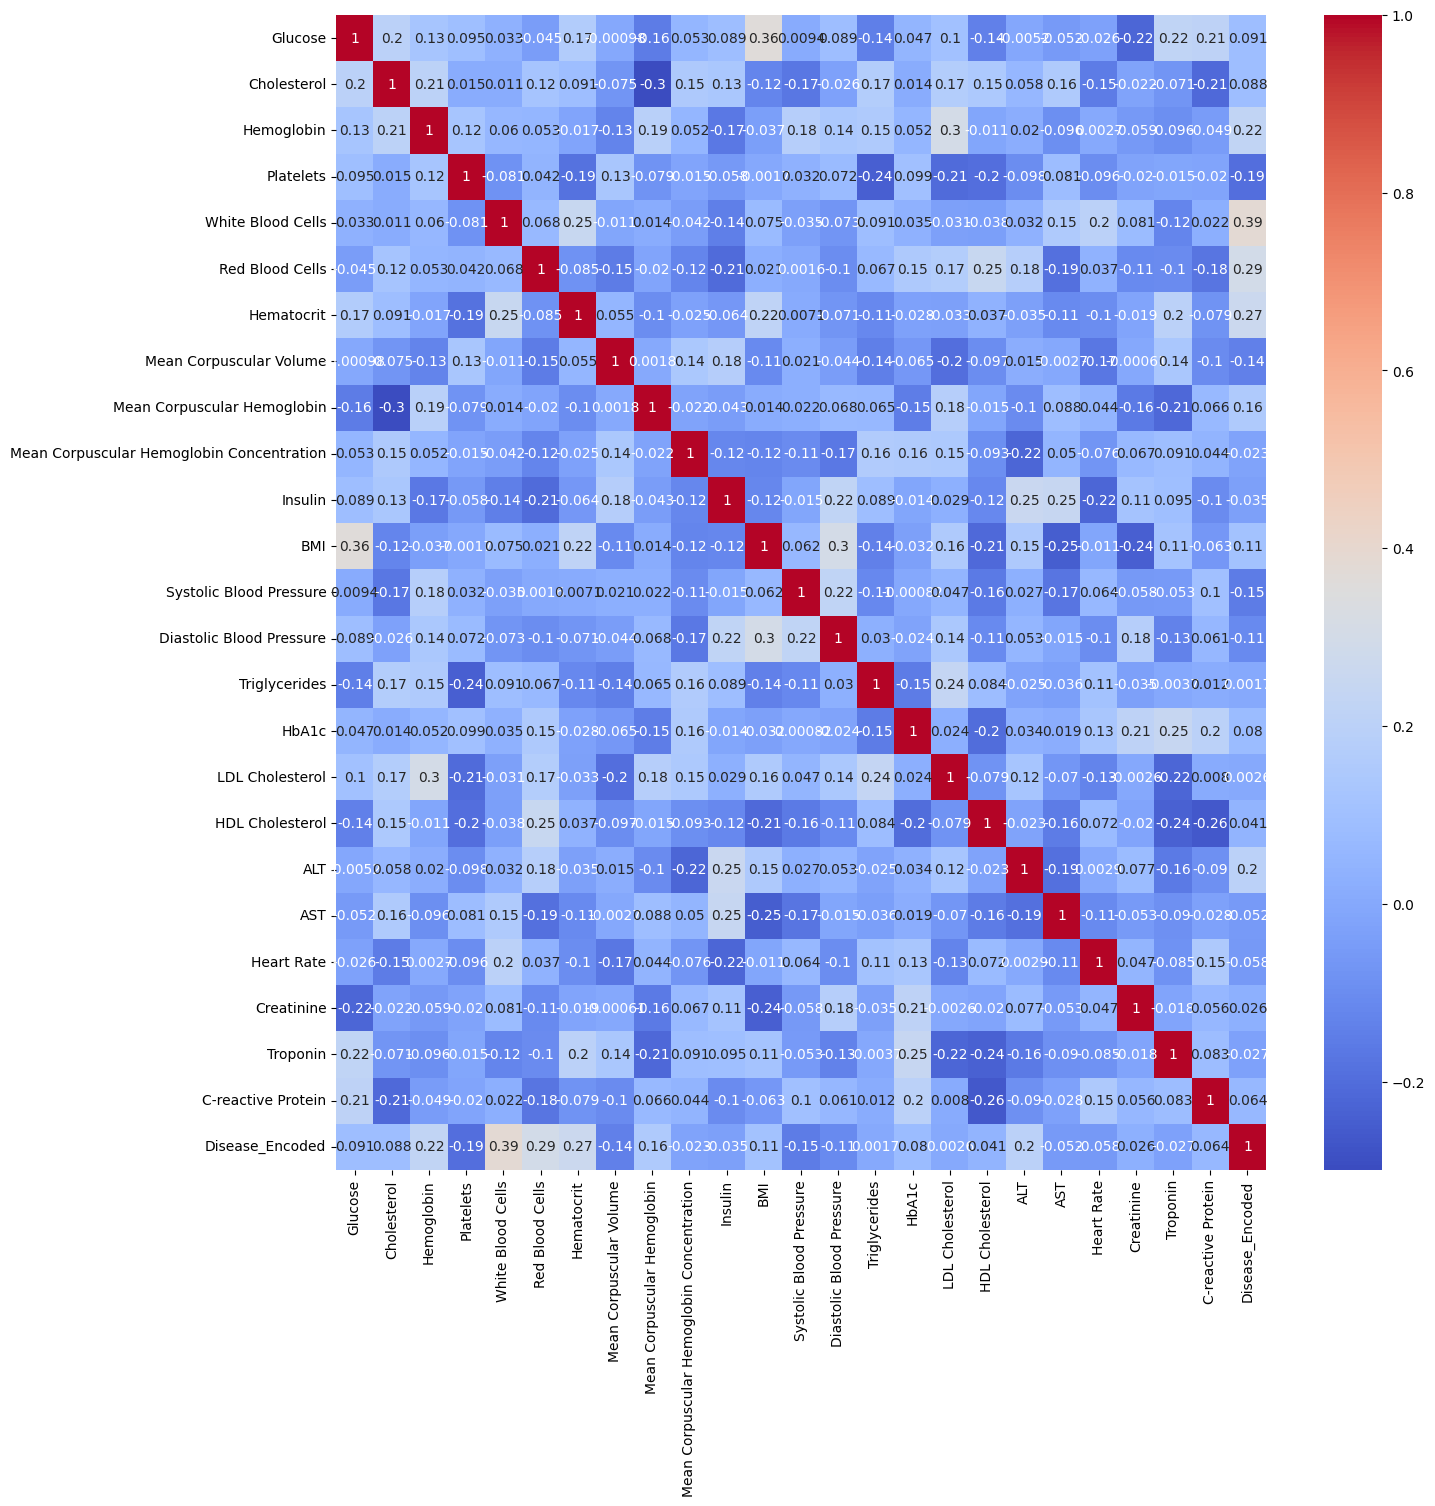

In [ ]:
n_col = df_anlys.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = df_anlys[n_col].corr()
mtplt.figure(figsize=(15, 15))
sbn.heatmap(corr, annot=True, cmap='coolwarm')

# get the top 5 correlated features with the Key column except the Key column itself
top_5_corr_features = corr['Disease_Encoded'].sort_values(ascending=False)[1:6]
print("Top 5 correlated features with the Key column are: ")

In [ ]:
feat_resampl = dfc.drop('Disease', axis=1).values
pred_resampl = dfc['Disease'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feat_resampl, pred_resampl, random_state=1, test_size=0.2)

In [ ]:
sc = spark.sparkContext

In [ ]:
class RDDSimpleDecisionTreeRegressor:
    def __init__(self, dpt=1):
        self.dpt = dpt
        self.tree_ = None

    def fit(self, data):
        def grow_tree(data, depth):
            if depth >= self.dpt or len(data) <= 1:
                prediction = sum([x.label for x in data]) / len(data)
                return {'prediction': prediction}

            bst_gain = -1
            best_split = None
            num_features = len(data[0].features)

            for feature in range(num_features):
                points = sorted(set([z.features[feature] for z in data]))
                for i in range(1, len(points)):
                    split_point = (points[i-1] + points[i]) / 2
                    left_split = [z for z in data if z.features[feature] < split_point]
                    right_split = [z for z in data if z.features[feature] >= split_point]

                    if not left_split or not right_split:
                        continue

                    size_left = len(left_split)
                    size_right = len(right_split)
                    sum_left = sum(x.label for x in left_split)
                    sum_right = sum(x.label for x in right_split)

                    average_left = sum_left / size_left
                    average_right = sum_right / size_right
                    average_total = sum([x.label for x in data]) / len(data)

                    variance_left = sum((x.label - average_left)**2 for x in left_split)
                    variance_right = sum((x.label - average_right)**2 for x in right_split)
                    total_variance = sum((x.label - average_total)**2 for x in data)

                    tot_gain = total_variance - (variance_left + variance_right)

                    if tot_gain > bst_gain:
                        bst_gain = tot_gain
                        best_split = (feature, split_point, left_split, right_split)

            if bst_gain > 0:
                feature, split_point, left_split, right_split = best_split
                left_tree = grow_tree(left_split, depth + 1)
                right_tree = grow_tree(right_split, depth + 1)
                return {'feature': feature, 'value': split_point, 'left': left_tree, 'right': right_tree}

            prediction = sum([x.label for x in data]) / len(data)
            return {'prediction': prediction}

        if isinstance(data, RDD):
            data = data.collect()
        self.tree_ = grow_tree(data, 0)

    def predict(self, features):
        def predict_single(tree, features):
            nd_tree = tree
            while 'left' in nd_tree or 'right' in nd_tree:
                if features[nd_tree['feature']] < nd_tree['value']:
                    nd_tree = nd_tree['left']
                else:
                    nd_tree = nd_tree['right']
            return nd_tree['prediction']

        return predict_single(self.tree_, features)

In [ ]:
class RDDGradientBoostingClassifier:
    def __init__(self, iter, l_r, dpt):
        self.iter = iter
        self.l_r = l_r
        self.dpt = dpt
        self.boost = []

    def fit(self, rdd):
        self.cls = rdd.map(lambda x: x.label).distinct().count()
        self.boost = []

        for m in range(self.iter):
            trees = []
            for k in range(self.cls):
                rdd_prepared = self._prepare_data(rdd, k)
                tree_regressor = RDDSimpleDecisionTreeRegressor(dpt=self.dpt)
                tree_regressor.fit(rdd_prepared)
                trees.append(tree_regressor)
            self.boost.append(trees)

    def _prepare_data(self, rdd, class_index):
        return rdd.map(lambda x: LabeledPoint(
            int(x.label == class_index),  # Binary classification per class
            x.features))

    def predict(self, rdd):
        boost = self.boost
        l_r = self.l_r
        cls = self.cls

        def predict_partition(iterator):
            predictions = []
            for item in iterator:
                features = item.features
                votes = npy.zeros(cls)
                for tr in boost:
                    for idx, tree in enumerate(tr):
                        votes[idx] += l_r * tree.predict(features)
                predictions.append((item, npy.argmax(votes)))
            return predictions

        return rdd.mapPartitions(predict_partition)

In [ ]:
def numpy_to_labeled_point(data, labels):
    return sc.parallelize([
        LabeledPoint(labels[i], Vectors.dense(data[i]))
        for i in range(len(data))
    ])

from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
y_train_en = lbl_encoder.fit_transform(y_train)
y_test_en = lbl_encoder.transform(y_test)



rdd_train = numpy_to_labeled_point(x_train, y_train_en)
rdd_test = numpy_to_labeled_point(x_test, y_test_en)



gbc_rdd = RDDGradientBoostingClassifier(iter=10, l_r=0.2, dpt=3)

# Fit the model
gbc_rdd.fit(rdd_train)

In [ ]:
predictions = gbc_rdd.predict(rdd_test)
pr_lb = []
for pred in predictions.collect():
  pr_lb.append(pred[1])
tr_lb = rdd_test.map(lambda x: x.label).collect()
print(pr_lb)

[3, 0, 4, 1, 1, 1, 1, 0, 3, 2, 0, 1, 0, 1, 2, 2, 2, 3, 3, 1, 1, 2, 3, 2, 2, 0, 1, 1, 4, 1, 3, 1, 2, 1, 3, 3, 0, 0, 0, 1, 0, 3, 0, 2, 2, 4, 3, 1, 1, 1, 1, 4, 3, 2, 3, 0, 0, 0, 2, 1, 0, 2, 1, 1, 3, 0, 3, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 3, 1, 4, 3, 2, 3, 4, 0, 2, 3, 0, 1, 2, 3, 0, 2, 3, 2, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 2, 2, 3, 0, 0, 3, 4, 2, 1, 1, 2, 2, 3, 1, 0, 2, 1, 2, 2, 4, 1, 2, 0, 0, 2, 1, 3, 0, 2, 3, 0, 2, 1, 0, 3, 0, 2, 0, 0, 0, 2, 4, 4, 1, 2, 3, 2, 3, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 4, 4, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 3, 1, 1, 0, 3, 3, 1, 2, 0, 1, 0, 3, 3, 1, 3, 4, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 0, 1, 1, 0, 1, 2, 3, 4, 0, 2, 3, 3, 0, 2, 1, 2, 1, 1, 0, 2, 1, 4, 3, 2, 2, 2, 0, 0, 2, 4, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 3, 4, 1, 3, 3, 1, 0, 3, 4, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 4, 0, 3, 1, 2, 0, 1, 0, 2, 3, 2, 0, 3, 0, 3, 2, 0, 2, 1, 0, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 4, 0, 2, 3, 3, 0, 4, 3, 2, 0, 2, 0, 1, 

In [ ]:
predictions = gbc_rdd.predict(rdd_train)
pred_lbs_train = []
for pred in predictions.collect():
  pred_lbs_train.append(pred[1])
tr_lb_train= rdd_train.map(lambda x: x.label).collect()
print(pred_lbs_train)

[0, 2, 2, 2, 2, 0, 3, 1, 3, 2, 4, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 3, 3, 0, 3, 0, 3, 3, 2, 0, 1, 3, 2, 0, 2, 1, 4, 0, 2, 0, 0, 0, 2, 3, 2, 3, 3, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 3, 3, 2, 0, 1, 2, 0, 1, 3, 2, 2, 2, 3, 0, 4, 2, 4, 0, 3, 0, 3, 0, 2, 0, 1, 3, 0, 1, 1, 1, 2, 0, 1, 2, 3, 3, 0, 2, 0, 1, 1, 0, 0, 1, 0, 4, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 3, 1, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 3, 3, 1, 0, 1, 0, 3, 3, 0, 0, 0, 2, 4, 2, 4, 3, 2, 2, 0, 3, 1, 0, 2, 0, 1, 0, 3, 0, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 3, 2, 2, 0, 2, 1, 3, 0, 0, 3, 1, 1, 2, 0, 3, 1, 0, 0, 0, 2, 2, 0, 3, 3, 3, 0, 0, 0, 2, 0, 4, 0, 0, 1, 2, 3, 0, 0, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 0, 2, 0, 1, 2, 0, 3, 1, 2, 1, 3, 1, 2, 1, 0, 1, 3, 0, 2, 3, 3, 1, 3, 1, 0, 0, 0, 2, 0, 1, 2, 2, 4, 1, 4, 2, 2, 3, 1, 4, 0, 3, 1, 4, 3, 0, 0, 0, 2, 2, 1, 3, 0, 1, 0, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 2, 1, 2, 2, 0, 4, 3, 4, 0, 0, 2, 3, 3, 2, 1, 3, 0, 3, 2, 1, 0, 3, 2, 3, 0, 0, 1, 1, 2, 0, 2, 2, 0, 3, 1, 2, 2, 4, 0, 0, 0, 0, 1, 0, 0, 

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

training_acc=accuracy_score(tr_lb_train, pred_lbs_train)
print("Training- Accuracy:", training_acc)

testing_acc= accuracy_score(tr_lb, pr_lb)
print("Testing- Accuracy:", testing_acc)

precision_gbm = precision_score(tr_lb, pr_lb, average='weighted')
print("Precision:", precision_gbm)
# Calculating recall
recall_gbm = recall_score(tr_lb, pr_lb, average='weighted')
print("Recall:", recall_gbm)
# Calculating F1 score
f1_gbm = f1_score(tr_lb, pr_lb, average='weighted')
print("F1-score:", f1_gbm)

Training- Accuracy: 0.975
Testing- Accuracy: 0.9766454352441614
Precision: 0.9774690528748471
Recall: 0.9766454352441614
F1-score: 0.9766320178511522


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(tr_lb, pr_lb, output_dict=True)

In [ ]:

report['accuracy'] = {'precision': None, 'recall': None, 'f1-score': None, 'accuracy': training_acc}

In [ ]:
df_report = pnd.DataFrame(report).transpose()

In [ ]:
print(df_report)

              precision    recall  f1-score  support  accuracy
0.0            0.935484  1.000000  0.966667    116.0       NaN
1.0            0.974359  0.934426  0.953975    122.0       NaN
2.0            1.000000  1.000000  1.000000    109.0       NaN
3.0            1.000000  0.967742  0.983607     93.0       NaN
4.0            1.000000  1.000000  1.000000     31.0       NaN
accuracy            NaN       NaN       NaN      NaN     0.975
macro avg      0.981969  0.980434  0.980850    471.0       NaN
weighted avg   0.977469  0.976645  0.976632    471.0       NaN


In [ ]:
report['accuracy'] = {'precision': None, 'recall': None, 'f1-score': None, 'accuracy': testing_acc}

In [ ]:
df_report = pnd.DataFrame(report).transpose()

In [ ]:
print(df_report)

              precision    recall  f1-score  support  accuracy
0.0            0.935484  1.000000  0.966667    116.0       NaN
1.0            0.974359  0.934426  0.953975    122.0       NaN
2.0            1.000000  1.000000  1.000000    109.0       NaN
3.0            1.000000  0.967742  0.983607     93.0       NaN
4.0            1.000000  1.000000  1.000000     31.0       NaN
accuracy            NaN       NaN       NaN      NaN  0.976645
macro avg      0.981969  0.980434  0.980850    471.0       NaN
weighted avg   0.977469  0.976645  0.976632    471.0       NaN


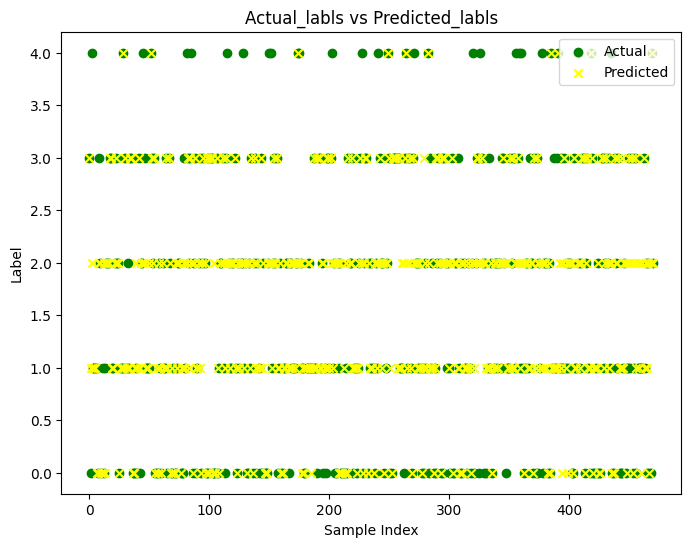

In [ ]:
mtplt.figure(figsize=(8, 6))
mtplt.scatter(range(len(tr_lb)), tr_lb, color='Green', label='Actual')
mtplt.scatter(range(len(pr_lb)), pr_lb, color='Yellow', marker='x', label='Predicted')

mtplt.xlabel('Sample Index')
mtplt.ylabel('Label')
mtplt.title('Actual_labls vs Predicted_labls')
mtplt.legend()
mtplt.show()

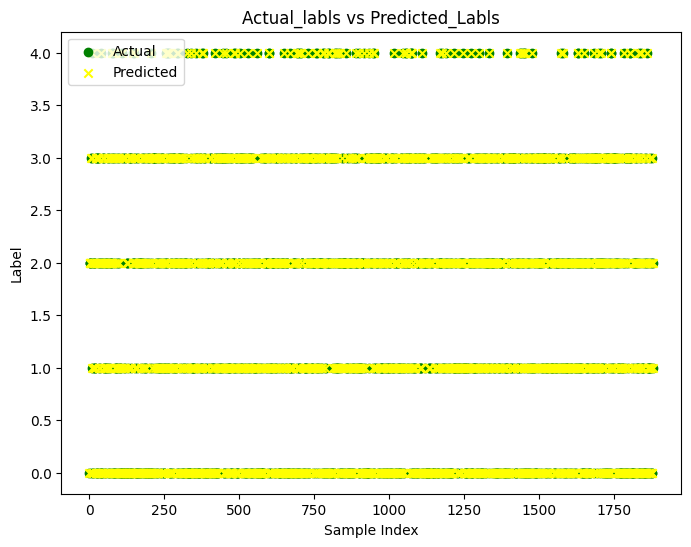

In [ ]:
mtplt.figure(figsize=(8, 6))
mtplt.scatter(range(len(tr_lb_train)), tr_lb_train, color='Green', label='Actual')
mtplt.scatter(range(len(pred_lbs_train)), pred_lbs_train, color='Yellow', marker='x', label='Predicted')

mtplt.xlabel('Sample Index')
mtplt.ylabel('Label')
mtplt.title('Actual_labls vs Predicted_Labls')
mtplt.legend()
mtplt.show()

In [ ]:
y_train_en = label_encoder.fit_transform(y_train)
y_test_en = label_encoder.transform(y_test)

In [ ]:
spark = SparkSession.builder.appName("CustomGBM").getOrCreate()

# Convert to RDDs,
x_train_rdd = spark.sparkContext.parallelize(x_train.tolist())
y_train_rdd = spark.sparkContext.parallelize(y_train_en.tolist())
x_test_rdd = spark.sparkContext.parallelize(x_test.tolist())
y_test_rdd = spark.sparkContext.parallelize(y_test_en.tolist())

# Display the shapes of the data
print(x_train.shape, y_train, x_test.shape, y_test)

(1880, 24) ['Anemia' 'Healthy' 'Healthy' ... 'Healthy' 'Diabetes' 'Healthy'] (471, 24) ['Thalasse' 'Anemia' 'Thromboc' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Anemia' 'Thalasse' 'Healthy' 'Anemia' 'Diabetes' 'Anemia'
 'Diabetes' 'Healthy' 'Healthy' 'Healthy' 'Thalasse' 'Thalasse' 'Diabetes'
 'Diabetes' 'Healthy' 'Thalasse' 'Healthy' 'Healthy' 'Anemia' 'Diabetes'
 'Diabetes' 'Thromboc' 'Diabetes' 'Thalasse' 'Diabetes' 'Healthy'
 'Diabetes' 'Thalasse' 'Thalasse' 'Anemia' 'Anemia' 'Anemia' 'Diabetes'
 'Anemia' 'Thalasse' 'Anemia' 'Healthy' 'Healthy' 'Thromboc' 'Thalasse'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Thromboc' 'Thalasse'
 'Healthy' 'Thalasse' 'Anemia' 'Anemia' 'Anemia' 'Healthy' 'Diabetes'
 'Anemia' 'Healthy' 'Diabetes' 'Diabetes' 'Thalasse' 'Anemia' 'Thalasse'
 'Healthy' 'Anemia' 'Anemia' 'Diabetes' 'Anemia' 'Anemia' 'Diabetes'
 'Healthy' 'Healthy' 'Anemia' 'Anemia' 'Anemia' 'Thalasse' 'Diabetes'
 'Thromboc' 'Thalasse' 'Healthy' 'Thalasse' 'Thromboc' 'Anemia' 'Healt

In [ ]:
from pyspark.ml.linalg import Vectors

# Combine features and labels for training data
train_rdd_svm = x_train_rdd.zip(y_train_rdd).map(lambda Z: (Vectors.dense(Z[0]), Z[1]))

# Combine features and labels for testing data
test_rdd_svm = x_test_rdd.zip(y_test_rdd).map(lambda Z: (Vectors.dense(Z[0]), Z[1]))

In [ ]:
import numpy as np
from collections import defaultdict

class MultiClassSVM:
    def __init__(self, max_iter=100, lr=0.01, reg_param=0.01):
        self.max_iter = max_iter
        self.lr = lr
        self.reg_param = reg_param
        self.classifiers = {}

    def fit(self, rdd):
        # Get all distinct labels
        temp = rdd.map(lambda x: x[1])
        labels= temp.sample(False,0.01).distinct().collect()
        print(len(labels))

        for label in labels:
            print(label)
            binary_rdd = rdd.map(lambda Z: (Z[0], 1 if Z[1] == label else -1))
            classifier = LinearSVM(self.max_iter, self.lr, self.reg_param)
            classifier.fit(binary_rdd)
            self.classifiers[label] = classifier

    def predict(self, features):
        scores = {label: classifier.predict(features) for label, classifier in self.classifiers.items()}
        return max(scores, key=scores.get)


train_rdd_svm = x_train_rdd.zip(y_train_rdd).map(lambda Z: (np.array(Z[0]), Z[1]))


test_rdd_svm = x_test_rdd.zip(y_test_rdd).map(lambda Z: (np.array(Z[0]), Z[1]))

# Define the Linear SVM class for binary classification
class LinearSVM:
    def __init__(self, max_iter=100, lr=0.01, reg_param=0.01):
        self.max_iter = max_iter
        self.lr = lr
        self.reg_param = reg_param
        self.weights = None
        self.bias = None

    def fit(self, rdd):
        num_features = len(rdd.first()[0])
        self.weights = np.zeros(num_features)
        self.bias = 0

        for AB in range(self.max_iter):
            print("iteration-",AB)
            for features, label in rdd.collect():
                features = np.array(features)
                label = 1 if label == 1 else -1

                prediction = np.dot(features, self.weights) + self.bias
                condition = label * prediction >= 1

                if condition:
                    grad_w = self.reg_param * self.weights
                    grad_b = 0
                else:
                    grad_w = self.reg_param * self.weights - label * features
                    grad_b = -label

                self.weights -= self.lr * grad_w
                self.bias -= self.lr * grad_b

    def predict(self, features):
        return np.dot(features, self.weights) + self.bias

# Instantiate and fit the multi-class SVM model
multi_class_svm = MultiClassSVM(max_iter=100, lr=0.01, reg_param=0.01)
multi_class_svm.fit(train_rdd_svm)

# Evaluate the Model
# Evaluate training accuracy
train_preds = train_rdd_svm.map(lambda Z: (Z[1], multi_class_svm.predict(Z[0])))
train_accuracy = train_preds.filter(lambda Z: Z[0] == Z[1]).count() / float(train_preds.count())
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate testing accuracy
test_preds = test_rdd_svm.map(lambda Z: (Z[1], multi_class_svm.predict(Z[0])))
test_accuracy = test_preds.filter(lambda Z: Z[0] == Z[1]).count() / float(test_preds.count())
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

5
2
iteration- 0
iteration- 1
iteration- 2
iteration- 3
iteration- 4
iteration- 5
iteration- 6
iteration- 7
iteration- 8
iteration- 9
iteration- 10
iteration- 11
iteration- 12
iteration- 13
iteration- 14
iteration- 15
iteration- 16
iteration- 17
iteration- 18
iteration- 19
iteration- 20
iteration- 21
iteration- 22
iteration- 23
iteration- 24
iteration- 25
iteration- 26
iteration- 27
iteration- 28
iteration- 29
iteration- 30
iteration- 31
iteration- 32
iteration- 33
iteration- 34
iteration- 35
iteration- 36
iteration- 37
iteration- 38
iteration- 39
iteration- 40
iteration- 41
iteration- 42
iteration- 43
iteration- 44
iteration- 45
iteration- 46
iteration- 47
iteration- 48
iteration- 49
iteration- 50
iteration- 51
iteration- 52
iteration- 53
iteration- 54
iteration- 55
iteration- 56
iteration- 57
iteration- 58
iteration- 59
iteration- 60
iteration- 61
iteration- 62
iteration- 63
iteration- 64
iteration- 65
iteration- 66
iteration- 67
iteration- 68
iteration- 69
iteration- 70
iteration- 7

In [ ]:
# Helper function to compute overall metrics
def compute_overall_metrics(predictions):
    tp_total, fp_total, fn_total = 0, 0, 0
    metrics = defaultdict(lambda: {"TP": 0, "FP": 0, "FN": 0})

    for actual, predicted in predictions:
        if actual == predicted:
            metrics[actual]["TP"] += 1
        else:
            metrics[actual]["FN"] += 1
            metrics[predicted]["FP"] += 1

    # Summing up all the TP, FP, FN
    for stat in metrics.values():
        tp_total += stat["TP"]
        fp_total += stat["FP"]
        fn_total += stat["FN"]

    precision_svm = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    recall_svm = tp_total / (tp_total + fn_total) if (tp_total + fn_total) > 0 else 0
    f1_svm = 2 * precision_svm * recall_svm / (precision_svm + recall_svm) if (precision_svm + recall_svm) > 0 else 0

    print(f"Precision: {precision_svm:.2f}")
    print(f"Recall: {recall_svm:.6f}")
    print(f"F1-Score: {f1_svm:.6f}")

# Evaluate training predictions
train_predictions = train_rdd_svm.map(lambda x: (x[1], multi_class_svm.predict(x[0]))).collect()
print("Training Metrics:")
compute_overall_metrics(train_predictions)

# Evaluate testing predictions
test_predictions = test_rdd_svm.map(lambda x: (x[1], multi_class_svm.predict(x[0]))).collect()
print("\nTesting Metrics:")
compute_overall_metrics(test_predictions)


Training Metrics:
Precision: 0.86
Recall: 0.859574
F1-Score: 0.859574

Testing Metrics:
Precision: 0.86
Recall: 0.861996
F1-Score: 0.861996
